## Lab-2.2: Binary and multi-class classification via neural-networks

* In this lab we perform binary classification on the IMDB dataset and multi-class classification on the Newswire data-set. 

**Instructions** 
* Code both binary and multi-class using a deep feed forward fully connected Neural network
  * Binary classification: IMDB data-set 
  * Multi-class classification: Newswire data-set 
  * **Do each example with Keras AND then Pytorch**
  * Use a dense feed forward ANN model
  * Normalize the data as needed
  * Visualize the results at the end where possible
  * Partition data into training, validation, and test
  * Monitor training and validation throughout training by plotting
  * Print training, validation, and test errors at the very end
  * Do basic hyper parameter tuning to try to achieve an optimal fit model
    * i.e. best training/validation loss without over-fitting
    * Explore L1 and L2 regularization
    * Explore different optimizers 
    * Use the loss functions specified in the textbook
    * Explore different options for activation functions, network size/depth, etc
* **Document what is going on in the code, as needed, with narrative markdown text between cells.**
* *Submit the version with hyper parameters that provide the optimal fit*
  * i.e. you don't need to show the outputs of your hyper-parameter tuning process
  
**Important: The Keras portion of this assignment is included as an example in the text book**
  *  Binary classification: See the textbook (Chollet chapter-3, page 68) for reference 
  *  Multi-class classification: See the textbook (Chollet chapter-3, page 78) for reference
  
**Submission:**
* You need to upload ONE document to Canvas when you are done
  * (1) A PDF (or HTML) of the completed form of this notebook 
* The final uploaded version should NOT have any code-errors present 
* All outputs must be visible in the uploaded version, including code-cell outputs, images, graphs, etc

## Binary Classification

### Data preparation 

* Insert cells below

In [1]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

#normalizing the data
import numpy as np
for i in range(len(train_data)):
    mean = sum(train_data[i]) // len(train_data[i])
    
    std =[]
    for k in range(len(train_data[i])):
        train_data[i][k] -= meanlist[i]
        stdvalue = np.sqrt((np.sum(train_data[i][k] - meanlist[i]) **2)//len(train_data[i]))
        std.append(stdvalue)
        train_data[i][k] /= std[k]
        
        #test_data -= mean
        #test_data /= std

In [2]:
max([max(sequence) for sequence in train_data])

9999

In [3]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [4]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [5]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [6]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

### Keras training

* Insert cells below

In [7]:
#model definition
from keras import models
from keras import layers
from keras import regularizers
model = models.Sequential()
model.add(layers.Dense(16, #kernel_regularizer = regularizers.l1_l2(l1 = 1e-5, l2 = 1e-4),
                       activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [8]:
#compiling the model
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [9]:
#configuring the optimizer
from tensorflow.keras import optimizers
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [10]:
# Using custom losses and metrics
from keras import losses
from keras import metrics
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss=losses.binary_crossentropy,metrics=[metrics.binary_accuracy])

In [11]:
#set aside a validation set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [12]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])

In [13]:
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 25ms/step - loss: 0.5098 - acc: 0.7911 - val_loss: 0.3743 - val_acc: 0.8757
Epoch 2/20
30/30 [==============================] - 1s 18ms/step - loss: 0.3034 - acc: 0.9031 - val_loss: 0.3066 - val_acc: 0.8827
Epoch 3/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2243 - acc: 0.9275 - val_loss: 0.2777 - val_acc: 0.8916
Epoch 4/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1790 - acc: 0.9427 - val_loss: 0.2726 - val_acc: 0.8896
Epoch 5/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1479 - acc: 0.9537 - val_loss: 0.2844 - val_acc: 0.8864
Epoch 6/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1216 - acc: 0.9627 - val_loss: 0.2927 - val_acc: 0.8865
Epoch 7/20
30/30 [==============================] - 1s 18ms/step - loss: 0.0968 - acc: 0.9688 - val_loss: 0.3103 - val_acc: 0.8836
Epoch 8/20
30/30 [==============================] - 1s 18ms/step - loss: 0.0808 - a

In [14]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

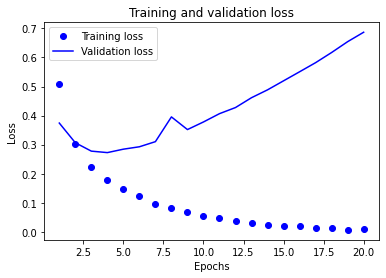

In [15]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['acc']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

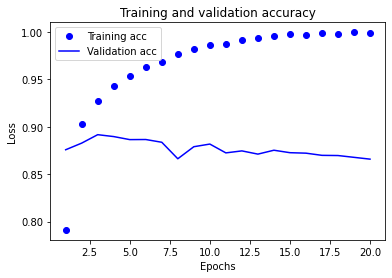

In [16]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [17]:
model = models.Sequential()
model.add(layers.Dense(16, kernel_regularizer = regularizers.l1_l2(l1 = 1e-5, l2 = 1e-4),
                       activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 15ms/step - loss: 0.4807 - accuracy: 0.8141
Epoch 2/4
49/49 [==============================] - 1s 14ms/step - loss: 0.2888 - accuracy: 0.9056
Epoch 3/4
49/49 [==============================] - 1s 14ms/step - loss: 0.2382 - accuracy: 0.9245
Epoch 4/4
782/782 [==============================] - 1s 2ms/step - loss: 0.3307 - accuracy: 0.8808


In [18]:
results

[0.3307383954524994, 0.8807600140571594]

In [19]:
model.predict(x_test)

array([[0.26541144],
       [0.999884  ],
       [0.9324957 ],
       ...,
       [0.14174744],
       [0.11610976],
       [0.73468727]], dtype=float32)

### Pytorch training

* Insert cells below

In [20]:
import torch
import torchvision
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [21]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32') 
y_test = np.asarray(test_labels).astype('float32')

In [22]:
x = x_train 
y = y_train 

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"USING {device} DEVICE")

input_dimension=x.shape[1]

# # Define model
class NeuralNetwork(torch.nn.Module):
    def __init__(self):
        #__init__() call to the parent class
        super(NeuralNetwork, self).__init__()
        #define linear model
        self.linear_model = torch.nn.Sequential(
            torch.nn.Linear(input_dimension, 6),
            torch.nn.Sigmoid(),
            torch.nn.Linear(6, 6),
            torch.nn.Sigmoid(),
            torch.nn.Linear(6, 1),
        )

    #FORWARD PASS (EVALUATION OF MODEL)
    def forward(self, x):
        out = self.linear_model(x)
        return out

#INITIALIZE MODEL 
model = NeuralNetwork().to(device)
print(model)

USING cpu DEVICE
NeuralNetwork(
  (linear_model): Sequential(
    (0): Linear(in_features=10000, out_features=6, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=6, out_features=6, bias=True)
    (3): Sigmoid()
    (4): Linear(in_features=6, out_features=1, bias=True)
  )
)


In [23]:
#CHECK PARAMETERS (NOTICE HOW THEY WERE AUTOMATICALLY RANDOMIZED)
for param in model.parameters():
    print(param)
    print(param.shape)
    print(param.requires_grad)

Parameter containing:
tensor([[ 0.0032,  0.0049, -0.0005,  ...,  0.0028,  0.0062,  0.0032],
        [-0.0033, -0.0084,  0.0033,  ...,  0.0026,  0.0098,  0.0061],
        [ 0.0075, -0.0006,  0.0058,  ...,  0.0005, -0.0028, -0.0023],
        [ 0.0063,  0.0009, -0.0043,  ...,  0.0032, -0.0087,  0.0011],
        [-0.0089, -0.0074,  0.0077,  ...,  0.0097, -0.0011,  0.0033],
        [-0.0092,  0.0024,  0.0100,  ...,  0.0094,  0.0024,  0.0011]],
       requires_grad=True)
torch.Size([6, 10000])
True
Parameter containing:
tensor([ 0.0081, -0.0010,  0.0054,  0.0089,  0.0070, -0.0076],
       requires_grad=True)
torch.Size([6])
True
Parameter containing:
tensor([[-0.3357, -0.2680,  0.3601, -0.3982, -0.3302,  0.2222],
        [-0.1455, -0.0989,  0.2974,  0.1659,  0.3270, -0.0198],
        [-0.1149, -0.0457, -0.2772,  0.0025,  0.0856, -0.1700],
        [ 0.4038,  0.1324, -0.2709,  0.3576,  0.2785,  0.0234],
        [ 0.3075, -0.3904, -0.0897, -0.3252, -0.0366,  0.2592],
        [ 0.4075,  0.0773, 

In [25]:
# CONVERT TO TORCH TENSOR AND EVALUATE MODEL AS A TEST
x=torch.tensor(x).view(x.shape[0],x.shape[1])
y=torch.tensor(y).view(x.shape[0],1)

from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=0)

print("X-VALIDATION:",x_val.shape,x_val.dtype)
print("Y-VALIDATION:",y_val.shape,y_val.dtype)
print("X-TRAIN:",x_train.shape,x_train.dtype)
print("Y-TRAIN:",y_train.shape,y_train.dtype)
y_pred = model(x_train.float())
print("PREDICTION:",y_pred.shape,y_pred.dtype)

X-VALIDATION: torch.Size([5000, 10000]) torch.float64
Y-VALIDATION: torch.Size([5000, 1]) torch.float32
X-TRAIN: torch.Size([20000, 10000]) torch.float64
Y-TRAIN: torch.Size([20000, 1]) torch.float32
PREDICTION: torch.Size([20000, 1]) torch.float32


In [26]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            train_loss_history.append(loss)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_train[:,0], x_train[:,1], y_train, c = 'b', marker='o')
ax.scatter(x_train[:,0], x_train[:,1], y_pred.detach().numpy(), c = 'r', marker='o')
plt.show()

In [29]:
epoch_array=[]
val_loss_history=[]
train_loss_history=[]

#INITIALIZE LOSS FUNCTION AND OPTIMIZER
loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.RMSprop(model.parameters(), lr=1e-2)

In [30]:
i_print=True

def train(x_train,y_train, model, loss_fn, optimizer):
    #TELL MODEL IT SHOULD BE TRAINING
    model.train()

    #BATCH IMPLEMENTATION 
    X, y = x_train.to(device).float(), y_train.to(device).float()

    # Compute prediction error
    pred = model(X)
    loss = loss_fn(pred, y)

    # Backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # if t % 5 == 0:
    loss = loss.item() 
    train_loss_history.append(loss)

    if(i_print):
        print(f"loss: {loss:>7f}")

In [31]:
def validate(x_val,y_val, model, loss_fn):
    #TELL MODEL IT SHOULD BE EVALUATING
    model.eval()
    X, y = x_val.to(device).float(), y_val.to(device).float()
    pred = model(X)
    val_loss = loss_fn(pred, y).item()
    val_loss_history.append(val_loss)
    if(i_print):
        print(f"Test Error: {val_loss:>8f}")

In [32]:
epochs = 600

for t in range(epochs):
    epoch_array.append(t)
    if t%30==0:
        i_print=True
        print(f"-------------------------------\nEpoch {t}")
    else: 
        i_print=False

    train(x_train,y_train, model, loss_fn, optimizer)
    validate(x_val,y_val, model, loss_fn)
print("Done!")

-------------------------------
Epoch 0
loss: 0.825941
Test Error: 0.265786
-------------------------------
Epoch 30
loss: 0.229689
Test Error: 0.243920
-------------------------------
Epoch 60
loss: 0.123656
Test Error: 0.138927
-------------------------------
Epoch 90
loss: 0.028624
Test Error: 0.080741
-------------------------------
Epoch 120
loss: 0.016191
Test Error: 0.084567
-------------------------------
Epoch 150
loss: 0.013061
Test Error: 0.088593
-------------------------------
Epoch 180
loss: 0.011388
Test Error: 0.091067
-------------------------------
Epoch 210
loss: 0.010661
Test Error: 0.090029
-------------------------------
Epoch 240
loss: 0.009986
Test Error: 0.092052
-------------------------------
Epoch 270
loss: 0.009443
Test Error: 0.093326
-------------------------------
Epoch 300
loss: 0.008989
Test Error: 0.094404
-------------------------------
Epoch 330
loss: 0.008627
Test Error: 0.095302
-------------------------------
Epoch 360
loss: 0.008269
Test Error: 

In [ ]:
# PLOT THE FIGURE
y_pred = model(x_train.float())

# PLOT THE FIGURE
# ax.scatter(x_val[:,0], x_val[:,1], y_val, c = 'r', marker='o')
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_train[:,0], x_train[:,1], y_train, c = 'b', marker='o')
ax.scatter(x_train[:,0], x_train[:,1], y_pred.detach().numpy(), c = 'r', marker='o')
plt.show()

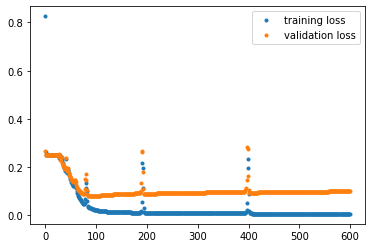

In [34]:
y_pred = model(x_train.float())

fig, ax = plt.subplots()
ax.plot(epoch_array, train_loss_history, '.', label='training loss')
ax.plot(epoch_array, val_loss_history, '.', label='validation loss')
ax.legend()
plt.show()

## Multi-class Classification

### Data preparation 

* Insert cells below

In [35]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2121728/2110848 [==============================] - 0s 0us/step


In [36]:
len(train_data)

8982

In [37]:
len(test_data)

2246

In [38]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [39]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

565248/550378 [==============================] - 0s 0us/step


In [40]:
train_labels[10]

3

In [41]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [42]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [43]:
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

### Keras training

* Insert cells below

In [44]:
#model definition
from keras import models
from keras import layers
from keras import regularizers
model = models.Sequential()
model.add(layers.Dense(64, #kernel_regularizer = regularizers.l1_l2(l1 = 1e-5, l2 = 1e-4),
                       activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [45]:
#compiling the model
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [46]:
#setting aside the validation set
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [47]:
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 38ms/step - loss: 2.5338 - accuracy: 0.5195 - val_loss: 1.6504 - val_accuracy: 0.6400
Epoch 2/20
16/16 [==============================] - 0s 29ms/step - loss: 1.3472 - accuracy: 0.7111 - val_loss: 1.2664 - val_accuracy: 0.7250
Epoch 3/20
16/16 [==============================] - 0s 29ms/step - loss: 1.0086 - accuracy: 0.7789 - val_loss: 1.1284 - val_accuracy: 0.7420
Epoch 4/20
16/16 [==============================] - 0s 31ms/step - loss: 0.8065 - accuracy: 0.8205 - val_loss: 1.0517 - val_accuracy: 0.7670
Epoch 5/20
16/16 [==============================] - 0s 28ms/step - loss: 0.6486 - accuracy: 0.8603 - val_loss: 0.9742 - val_accuracy: 0.8000
Epoch 6/20
16/16 [==============================] - 0s 29ms/step - loss: 0.5231 - accuracy: 0.8860 - val_loss: 0.9432 - val_accuracy: 0.8030
Epoch 7/20
16/16 [==============================] - 0s 28ms/step - loss: 0.4252 - accuracy: 0.9095 - val_loss: 0.9335 - val_accuracy: 0.8100
Epoch 8/20
16

In [48]:
history_dict1 = history.history
history_dict1.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

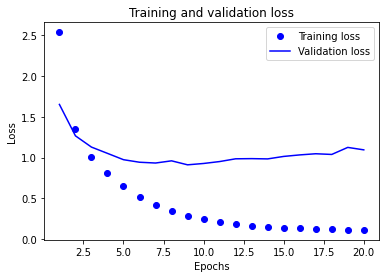

In [49]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

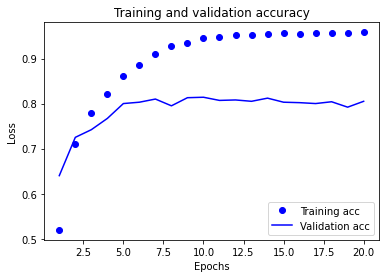

In [50]:
plt.clf()
acc = history_dict1['accuracy']
val_acc = history_dict1['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [51]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(partial_x_train,partial_y_train,epochs=9,batch_size=512,validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 1s 39ms/step - loss: 2.6019 - accuracy: 0.5301 - val_loss: 1.7414 - val_accuracy: 0.6530
Epoch 2/9
16/16 [==============================] - 1s 40ms/step - loss: 1.4331 - accuracy: 0.7065 - val_loss: 1.3249 - val_accuracy: 0.7040
Epoch 3/9
16/16 [==============================] - 1s 41ms/step - loss: 1.0728 - accuracy: 0.7636 - val_loss: 1.1827 - val_accuracy: 0.7480
Epoch 4/9
16/16 [==============================] - 1s 39ms/step - loss: 0.8554 - accuracy: 0.8111 - val_loss: 1.0468 - val_accuracy: 0.7780
Epoch 5/9
16/16 [==============================] - 1s 40ms/step - loss: 0.6777 - accuracy: 0.8603 - val_loss: 0.9871 - val_accuracy: 0.7940
Epoch 6/9
16/16 [==============================] - 1s 39ms/step - loss: 0.5440 - accuracy: 0.8867 - val_loss: 0.9380 - val_accuracy: 0.8040
Epoch 7/9
16/16 [==============================] - 1s 39ms/step - loss: 0.4361 - accuracy: 0.9108 - val_loss: 0.9282 - val_accuracy: 0.8040
Epoch 8/9
16/16 [===

In [52]:
results

[0.9841898679733276, 0.7867319583892822]

In [53]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.18477292965271594

In [54]:
predictions = model.predict(x_test)

In [55]:
predictions[0].shape

(46,)

In [56]:
np.sum(predictions[0])

1.0

In [57]:
np.argmax(predictions[0])

3

In [58]:
predictions = model.predict(x_test)

In [59]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [60]:
model.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy',metrics=['acc'])

In [61]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=128,validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 1s 13ms/step - loss: 2.8917 - accuracy: 0.2937 - val_loss: 2.2137 - val_accuracy: 0.3660
Epoch 2/20
63/63 [==============================] - 1s 11ms/step - loss: 1.8792 - accuracy: 0.4387 - val_loss: 1.6551 - val_accuracy: 0.5890
Epoch 3/20
63/63 [==============================] - 1s 11ms/step - loss: 1.4258 - accuracy: 0.6373 - val_loss: 1.4743 - val_accuracy: 0.6470
Epoch 4/20
63/63 [==============================] - 1s 11ms/step - loss: 1.2288 - accuracy: 0.6989 - val_loss: 1.4161 - val_accuracy: 0.6770
Epoch 5/20
63/63 [==============================] - 1s 11ms/step - loss: 1.1117 - accuracy: 0.7170 - val_loss: 1.3768 - val_accuracy: 0.6850
Epoch 6/20
63/63 [==============================] - 1s 11ms/step - loss: 1.0293 - accuracy: 0.7251 - val_loss: 1.3707 - val_accuracy: 0.6840
Epoch 7/20
63/63 [==============================] - 1s 11ms/step - loss: 0.9677 - accuracy: 0.7326 - val_loss: 1.3952 - val_accuracy: 0.6780
Epoch 8/20
63

### Pytorch training

* Insert cells below

In [69]:
# GET CPU OR GPU DEVICE FOR TRAINING.
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"USING {device} DEVICE")

input_dimension=x.shape[1] 

# # Define model
class NeuralNetwork(torch.nn.Module):
    def __init__(self):
        #__init__() call to the parent class
        super(NeuralNetwork, self).__init__()
        #define linear model
        self.linear_model = torch.nn.Sequential(
            torch.nn.Linear(input_dimension, 6),
            torch.nn.Sigmoid(),
            torch.nn.Linear(6, 6),
            torch.nn.Sigmoid(),
            torch.nn.Linear(6, 1),
        )

    #FORWARD PASS (EVALUATION OF MODEL)
    def forward(self, x):
        out = self.linear_model(x)
        return out

#INITIALIZE MODEL 
model = NeuralNetwork().to(device)
print(model)

USING cpu DEVICE
NeuralNetwork(
  (linear_model): Sequential(
    (0): Linear(in_features=10000, out_features=6, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=6, out_features=6, bias=True)
    (3): Sigmoid()
    (4): Linear(in_features=6, out_features=1, bias=True)
  )
)


In [70]:
for param in model.parameters():
    print(param)
    print(param.shape)
    print(param.requires_grad)

Parameter containing:
tensor([[-0.0073,  0.0031,  0.0046,  ...,  0.0031, -0.0051,  0.0060],
        [ 0.0090, -0.0003, -0.0034,  ...,  0.0075,  0.0037, -0.0031],
        [-0.0066,  0.0055,  0.0047,  ..., -0.0066,  0.0084, -0.0069],
        [ 0.0080, -0.0051,  0.0036,  ...,  0.0084,  0.0050,  0.0042],
        [ 0.0061,  0.0026, -0.0087,  ..., -0.0025,  0.0037, -0.0003],
        [ 0.0003, -0.0053, -0.0025,  ...,  0.0097,  0.0095,  0.0008]],
       requires_grad=True)
torch.Size([6, 10000])
True
Parameter containing:
tensor([ 0.0005,  0.0091, -0.0054,  0.0050,  0.0081, -0.0096],
       requires_grad=True)
torch.Size([6])
True
Parameter containing:
tensor([[ 0.1769, -0.2262, -0.1600,  0.2875,  0.2448, -0.2232],
        [-0.0616, -0.2983, -0.1500, -0.3924, -0.2717,  0.1926],
        [-0.3357, -0.1281,  0.3110,  0.1287,  0.3272,  0.2298],
        [ 0.4067, -0.0770, -0.3626,  0.3598,  0.0026,  0.3823],
        [ 0.4062, -0.0937, -0.3229, -0.1352, -0.3348, -0.2138],
        [-0.3228,  0.2437, 

In [72]:
# CONVERT TO TORCH TENSOR AND EVALUATE MODEL AS A TEST
x = x_train
y = y_train
x=torch.tensor(x).view(x.shape[0],x.shape[1])
y=torch.tensor(y).view(x.shape[0],1)

from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=0)

print("X-VALIDATION:",x_val.shape,x_val.dtype)
print("Y-VALIDATION:",y_val.shape,y_val.dtype)
print("X-TRAIN:",x_train.shape,x_train.dtype)
print("Y-TRAIN:",y_train.shape,y_train.dtype)
y_pred = model(x_train.float())
print("PREDICTION:",y_pred.shape,y_pred.dtype)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """


X-VALIDATION: torch.Size([1437, 10000]) torch.float64
Y-VALIDATION: torch.Size([1437, 1]) torch.int64
X-TRAIN: torch.Size([5748, 10000]) torch.float64
Y-TRAIN: torch.Size([5748, 1]) torch.int64
PREDICTION: torch.Size([5748, 1]) torch.float32


In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_train[:,0], x_train[:,1], y_train, c = 'b', marker='o')
ax.scatter(x_train[:,0], x_train[:,1], y_pred.detach().numpy(), c = 'r', marker='o')
plt.show()

In [74]:
epoch_array=[]
val_loss_history=[]
train_loss_history=[]

#INITIALIZE LOSS FUNCTION AND OPTIMIZER
loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.RMSprop(model.parameters(), lr=1e-2)


In [75]:
i_print=True

def train(x_train,y_train, model, loss_fn, optimizer):
    #TELL MODEL IT SHOULD BE TRAINING
    model.train()

    #BATCH IMPLEMENTATION 
    X, y = x_train.to(device).float(), y_train.to(device).float()

    # Compute prediction error
    pred = model(X)
    loss = loss_fn(pred, y)

    # Backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # if t % 5 == 0:
    loss = loss.item() 
    train_loss_history.append(loss)

    if(i_print):
        print(f"loss: {loss:>7f}")

In [76]:
def validate(x_val,y_val, model, loss_fn):
    #TELL MODEL IT SHOULD BE EVALUATING
    model.eval()
    X, y = x_val.to(device).float(), y_val.to(device).float()
    pred = model(X)
    val_loss = loss_fn(pred, y).item()
    val_loss_history.append(val_loss)
    if(i_print):
        print(f"Test Error: {val_loss:>8f}")



In [77]:
epochs = 600

for t in range(epochs):
    epoch_array.append(t)
    if t%30==0:
        i_print=True
        print(f"-------------------------------\nEpoch {t}")

    else: 
        i_print=False

    train(x_train,y_train, model, loss_fn, optimizer)
    validate(x_val,y_val, model, loss_fn)
print("Done!")

-------------------------------
Epoch 0
loss: 162.466187
Test Error: 147.319397
-------------------------------
Epoch 30
loss: 93.088226
Test Error: 87.150360
-------------------------------
Epoch 60
loss: 66.220505
Test Error: 64.993729
-------------------------------
Epoch 90
loss: 51.054699
Test Error: 53.948318
-------------------------------
Epoch 120
loss: 40.976795
Test Error: 48.173855
-------------------------------
Epoch 150
loss: 33.636421
Test Error: 44.485493
-------------------------------
Epoch 180
loss: 28.304018
Test Error: 42.673874
-------------------------------
Epoch 210
loss: 24.397766
Test Error: 41.722942
-------------------------------
Epoch 240
loss: 21.146221
Test Error: 41.551186
-------------------------------
Epoch 270
loss: 18.577894
Test Error: 40.659912
-------------------------------
Epoch 300
loss: 16.681026
Test Error: 39.719604
-------------------------------
Epoch 330
loss: 14.902871
Test Error: 41.326424
-------------------------------
Epoch 360
l

In [ ]:
y_pred = model(x_train.float())

# PLOT THE FIGURE
# ax.scatter(x_val[:,0], x_val[:,1], y_val, c = 'r', marker='o')
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_train[:,0], x_train[:,1], y_train, c = 'b', marker='o')
ax.scatter(x_train[:,0], x_train[:,1], y_pred.detach().numpy(), c = 'r', marker='o')
plt.show()

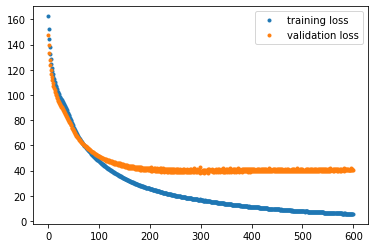

In [79]:
y_pred = model(x_train.float())

fig, ax = plt.subplots()
ax.plot(epoch_array, train_loss_history, '.', label='training loss')
ax.plot(epoch_array, val_loss_history, '.', label='validation loss')
ax.legend()
plt.show()